In [1]:
from skimage.filters import gaussian 
from skimage.color import rgb2hsv, hsv2rgb
import cv2 as cv
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import numpy as np
import sys
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split


In [2]:
import pandas as pd
#train_labels = pd.read_csv('../data/train_labels.csv')
#train_features = pd.read_csv('../data/train_features.csv')

#train_merged = pd.merge(train_labels, train_features, on='id')
train_merged = pd.read_csv("../data/train_dataset_info__100000_runs.csv")
train_merged_back = train_merged.copy()

#print(train_merged.head())

In [3]:
unique_sites = train_merged['site'].unique()

#temp_df = train_merged.groupby("site").sum()
#temp_df.drop("id", axis=1, inplace=True)
#temp_df.drop("filepath", axis=1, inplace=True)
#print(temp_df)
#total_sightings = temp_df.iloc[:, 1:].sum(axis=1).tolist()

#unique_sites = pd.DataFrame({"site": unique_sites, "total_sightings": total_sightings})

#unique_sites = unique_sites.sort_values(by="total_sightings", ascending=False)

#for site in unique_sites['site']:
#    print(f'"{site}",', end='')




In [4]:
def get_data(sites, input):
    processing = input.loc[input['site'].isin(sites)]
    print(processing.shape)
    labels = processing.drop(['id','filepath','site','shape','height','width','N_channels','aspect_ratio','animal_label'], axis=1)
    images = []

    for index, row in processing.iterrows():  
        image_path = row['filepath']
        #print(index)
        #print(image_path)
        image = cv.imread(os.path.join('../data/', image_path))
        image = cv.resize(image, (960, 540))
        if (index == 0):
            images = np.empty((processing.shape[0],) + image.shape, dtype=image.dtype)
        images[index] = image
    print("out of for")
    #images = np.array(images)
    print("made it here")
    return images, labels

In [5]:
#bla = unique_sites["site"].iloc[:10]
test1, test2 = get_data(unique_sites, train_merged_back)
#print(test2.head())
print(test2.shape)

(13118, 17)
out of for
made it here
(13118, 8)


In [6]:
#bababooey

In [7]:
def train_model(images, label):
    model = keras.Sequential([
    Flatten(input_shape=(960, 540, 3)),
    Dense(8, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(images, label, epochs=2, batch_size = 32)
    return model

In [8]:
#model = train_model(test1, test2)
#test3, test4 = get_data(["S0076","S0110","S0083","S0047"])

In [9]:
def print_accuracy(model, images, labels):
    loss, acc = model.evaluate(images, labels)
    print(f"Model loss: {loss}, Model accuracy: {acc}")


In [10]:
#print_accuracy(model, test3, test4)

In [11]:
#bla = unique_sites["site"].iloc[:10]
#test1, test2 = get_data(bla)

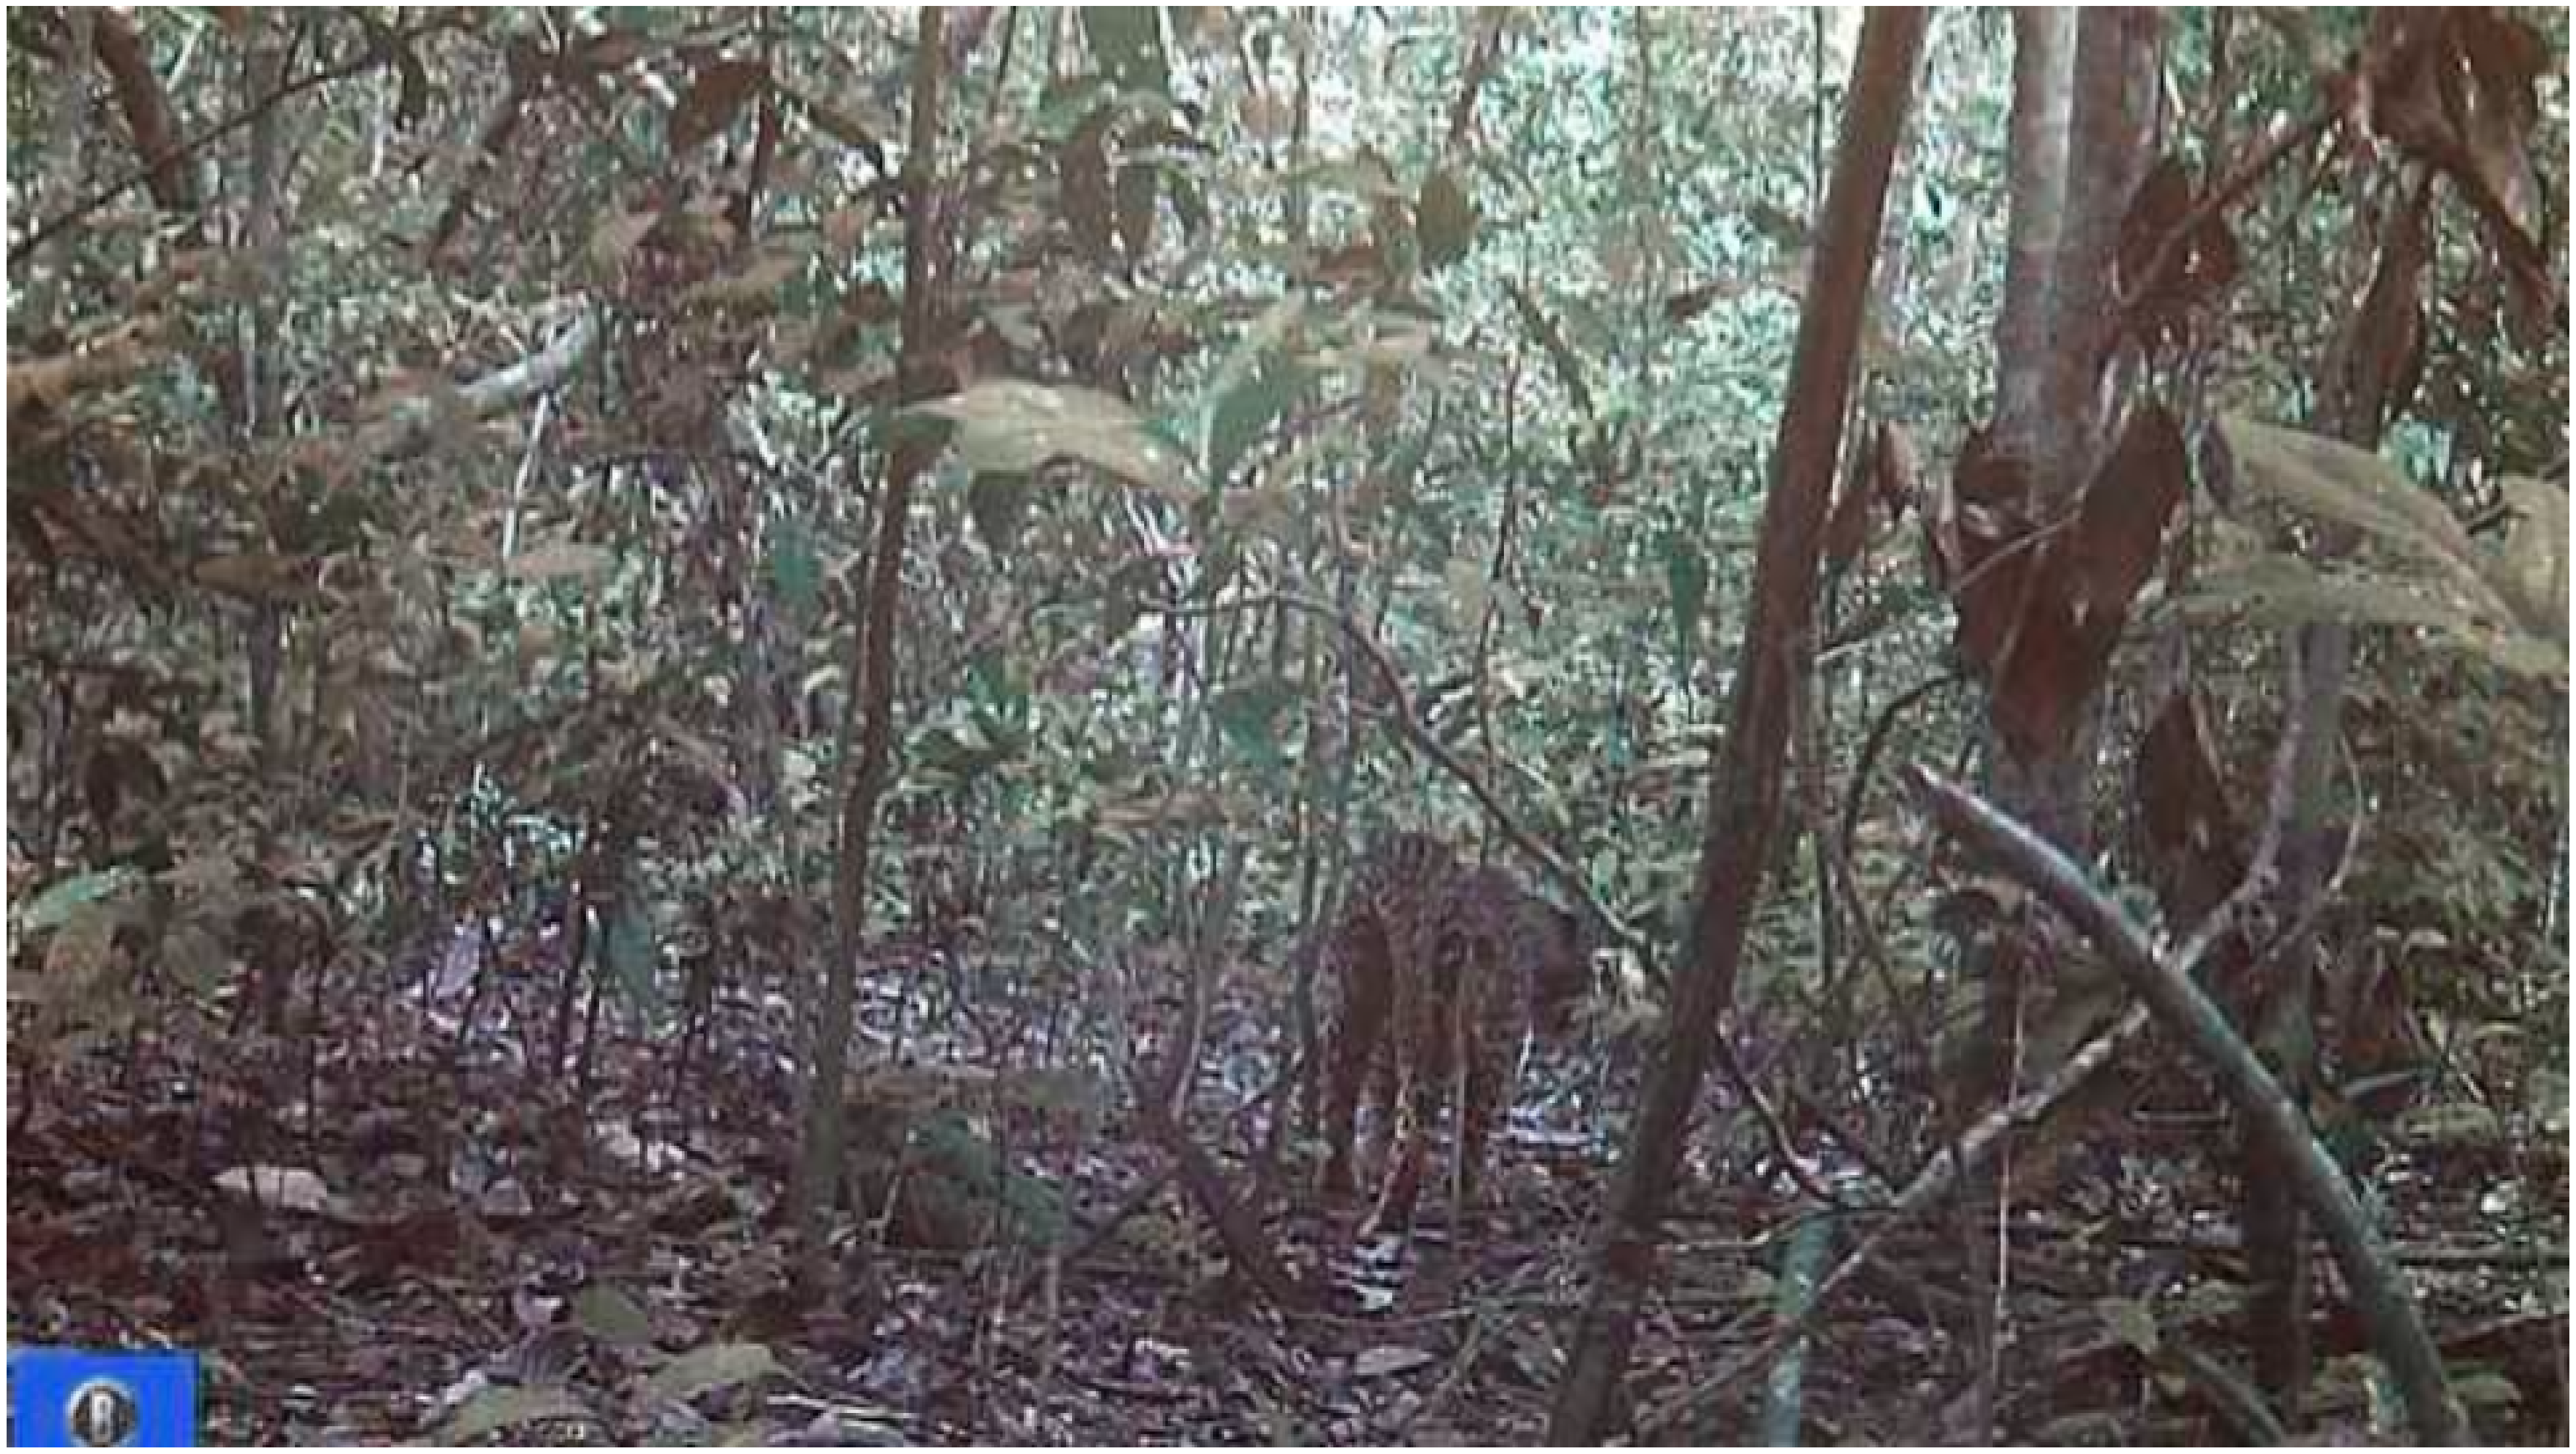

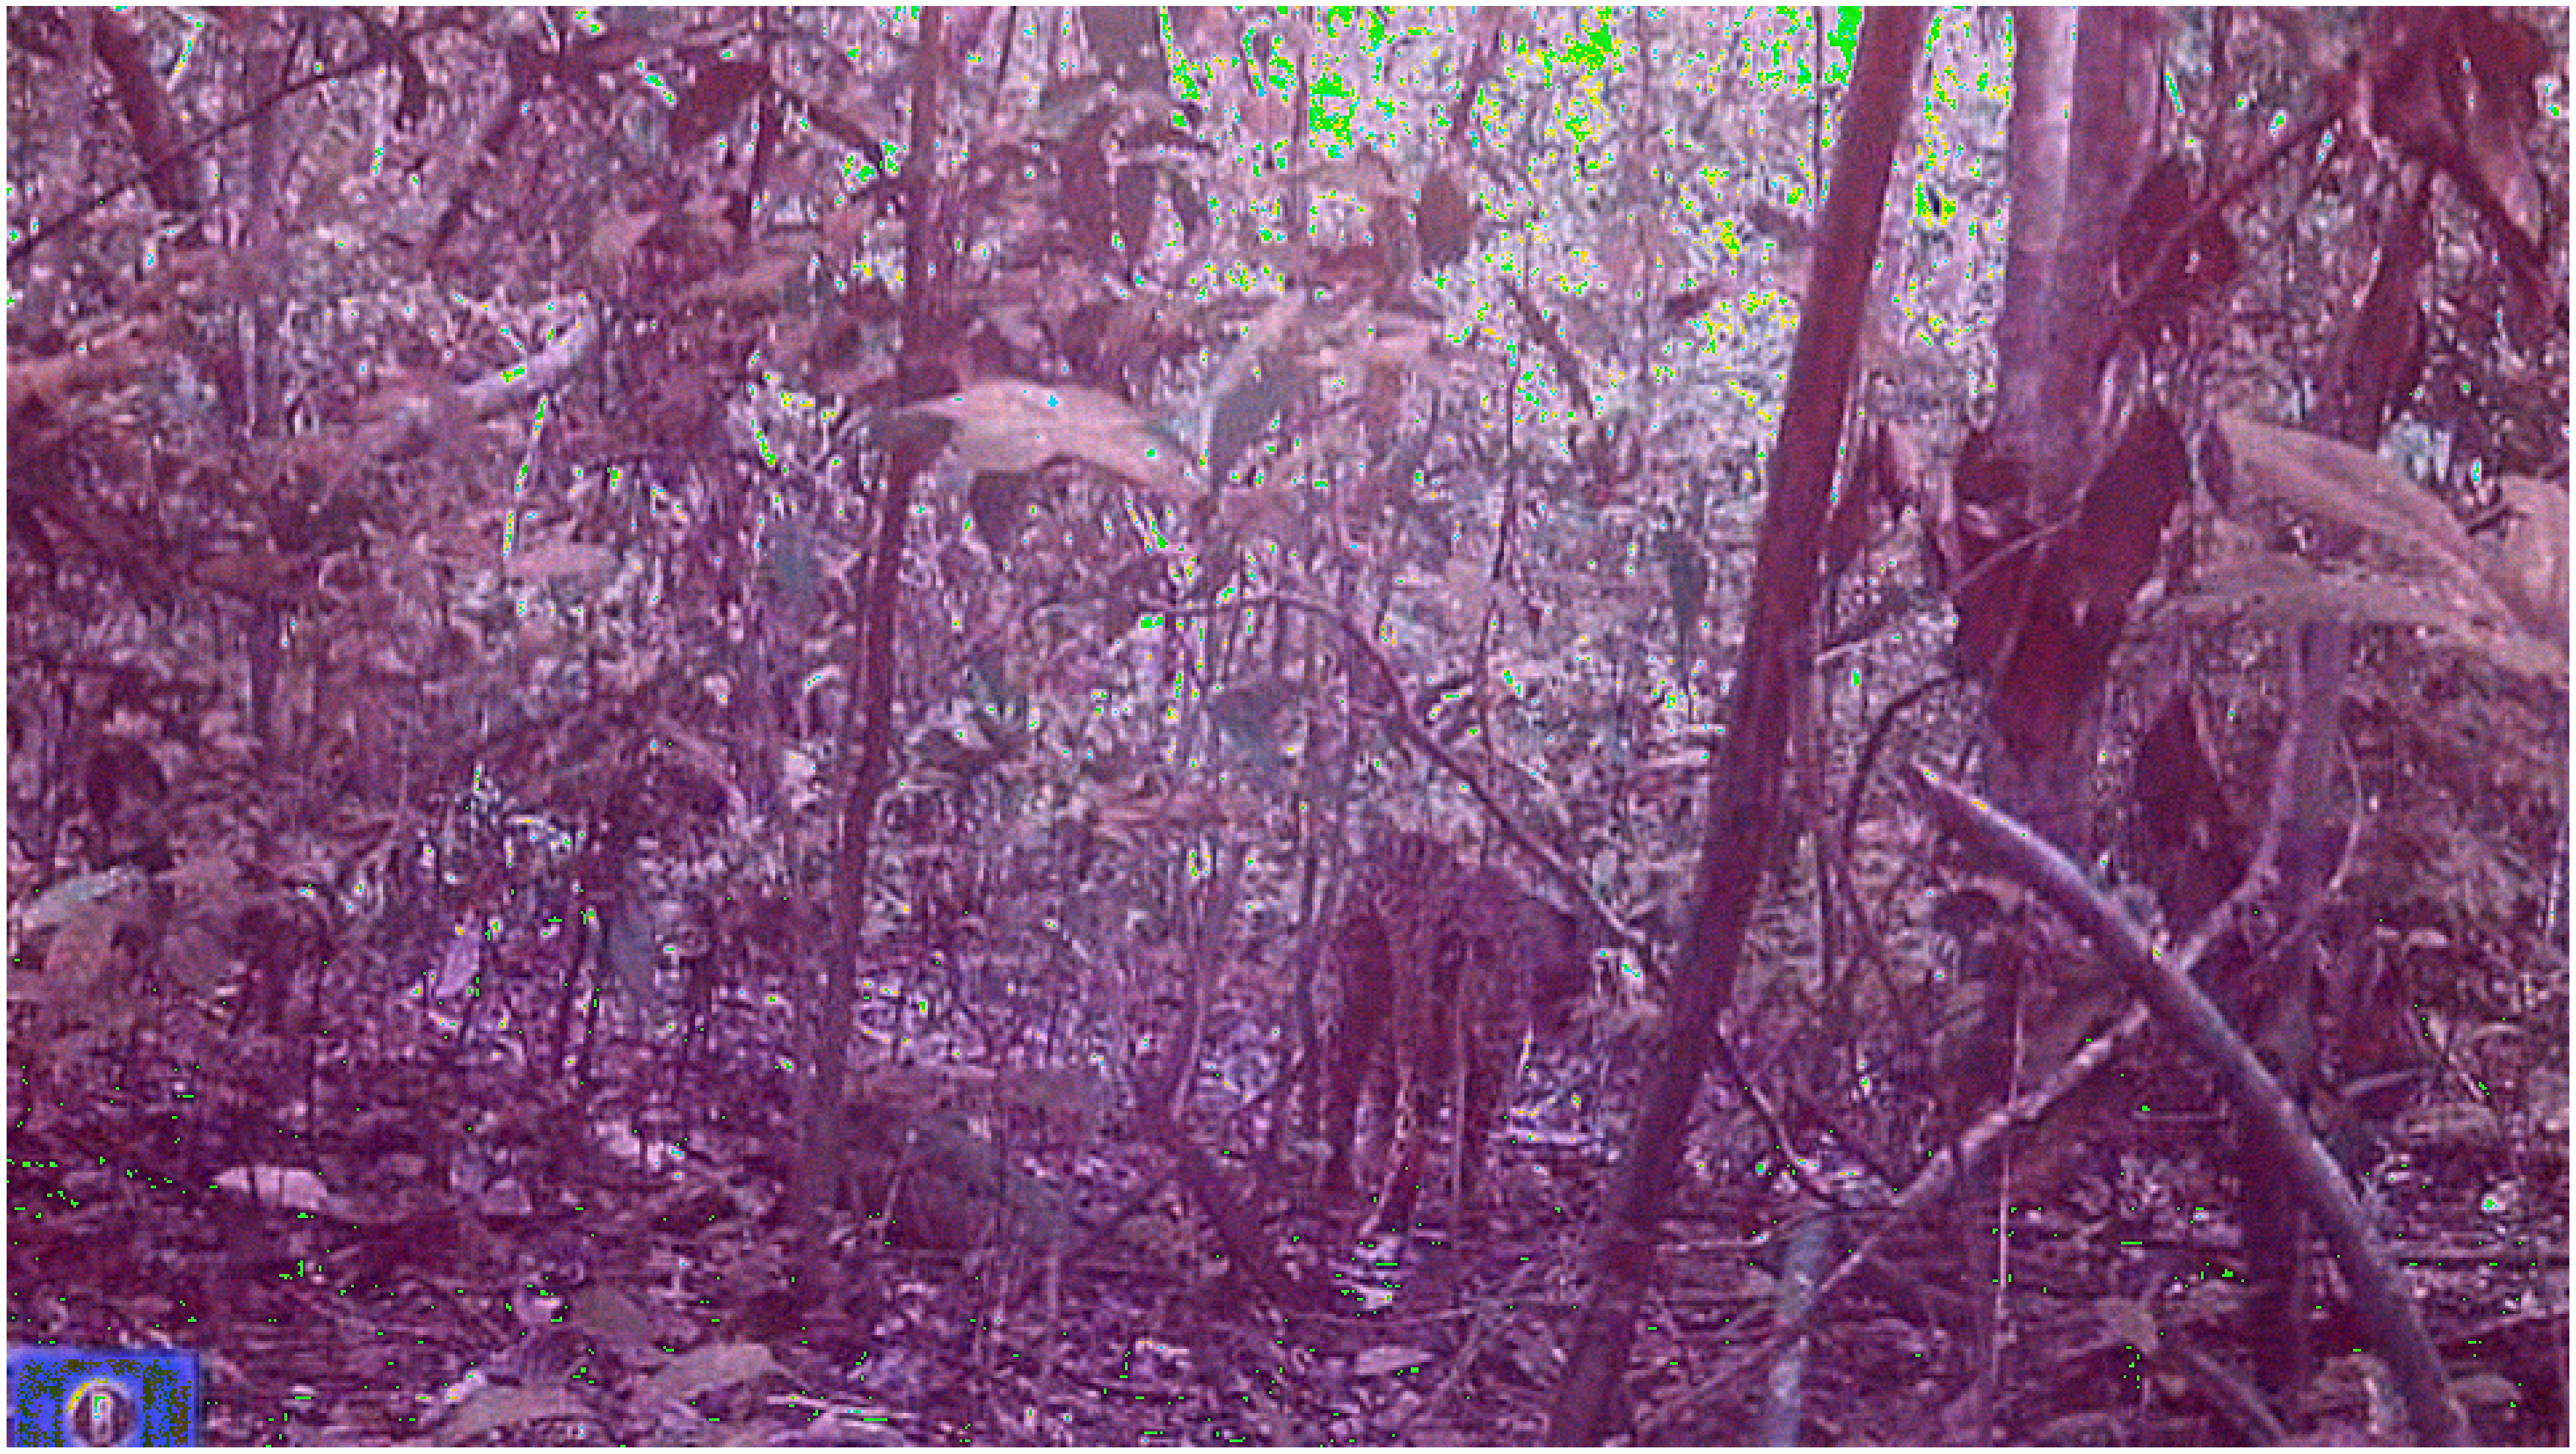

In [12]:
#concatt = [test2, test2]
#test2 = pd.concat(concatt)
#test1 = np.concatenate((test1, np.flip(test1, axis=2)))
#print(test2.shape)
#print(test1.shape)
np.random.seed(42)
image = test1[4] 
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
h, w, c = hsv_image.shape

noise_red = np.random.randint(10, 50, size=image.shape[:2])
noise_green = np.random.randint(-20, -10, size=image.shape[:2])
noise_blue = np.random.randint(10, 50, size=image.shape[:2])
fig, axes = plt.subplots(nrows = 1, figsize =(50, 50))
axes.imshow(image)
axes.axis("off")

#image2 = gaussian(image, sigma=1.5)
#fig, axes = plt.subplots(nrows = 1, figsize =(50, 50))
#axes.imshow(image2)
#axes.axis("off")

image3 = image.copy()
image3[:,:,0] += noise_red.astype(np.uint8)
image3[:,:,1] += noise_green.astype(np.uint8)
image3[:,:,2] += noise_blue.astype(np.uint8)
image3 = np.clip(image3, 0, 255)
fig, axes = plt.subplots(nrows=1, figsize=(50, 50))
axes.imshow(image3)
axes.axis("off")
plt.show()


In [13]:
#bababooey

In [14]:
def create_model():
    model = keras.Sequential([
    Flatten(input_shape=(960, 540, 3)),
    Dense(8, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

import random
tf.random.set_seed(42)
random.seed(42)

In [15]:
def test_aug(model, images, labels, test_images, test_labels):
    #fit
    epochs_num = 20
    batch_size_num = 32
    #gauss
    gaus_sigma_value = 1.5

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss default: {loss}, Model accuracy default: {acc}")
    del model

    model = create_model()
    images_flipped = np.flip(images, axis=2)
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(images_flipped, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss +flipped: {loss}, Model accuracy +flipped: {acc}")
    del model

    model = create_model()
    gaussed = []
    for image in images:
        gaussed.append(gaussian(image, sigma=gaus_sigma_value).astype(np.uint8))
    gaussed = np.array(gaussed)
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(gaussed, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss +gauss: {loss}, Model accuracy +gauss: {acc}")
    del model

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(images_flipped, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(gaussed, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss +flipped+gauss: {loss}, Model accuracy +flipped+gauss: {acc}")

    model = create_model()
    jittered = []
    for image in images:
        noise_red = np.random.randint(10, 50, size=image.shape[:2])
        noise_green = np.random.randint(-20, -10, size=image.shape[:2])
        noise_blue = np.random.randint(10, 50, size=image.shape[:2])
        jit_im = image.copy()
        jit_im[:,:,0] += noise_red.astype(np.uint8)
        jit_im[:,:,1] += noise_green.astype(np.uint8)
        jit_im[:,:,2] += noise_blue.astype(np.uint8)
        jit_im = np.clip(image3, 0, 255)
        jittered.append(jit_im)
    jittered = np.array(jittered)
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(jittered, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss +jitter: {loss}, Model accuracy +jitter: {acc}")
    del model

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(images_flipped, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(jittered, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss +flipped+jitter: {loss}, Model accuracy +flipped+jitter: {acc}")
    del model

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(gaussed, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(jittered, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss +gauss+jitter: {loss}, Model accuracy +gauss+jitter: {acc}")
    del model

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(images_flipped, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(gaussed, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(jittered, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss +flipped+gauss+jitter: {loss}, Model accuracy +flipped+gauss+jitter: {acc}")
    del model
    

    

In [19]:
#bla = unique_sites["site"].iloc[:10]
train_img = test1
train_lbl = test2

test_files = pd.read_csv("../data/test_dataset_info__100000_runs.csv")
unique_test = test_files['site'].unique()
test_img, test_lbl = get_data(unique_test, test_files)

model = create_model()

model.fit(train_img, train_lbl, epochs=20, batch_size=32)

#test_aug(model, train_img, train_lbl, test_img, test_lbl)
print_accuracy(model, test_img, test_lbl)


(1654, 17)
out of for
made it here


/Users/riael/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


: 

In [ ]:
print_accuracy(model, test_img, test_lbl)

In [ ]:
bababooey

In [ ]:
def test_jitter(model, images, labels, test_images, test_labels):
    #fit
    epochs_num = 20
    batch_size_num = 32
    #gauss
    gaus_sigma_value = 1.5

    images_flipped = np.flip(images, axis=2)
  
    gaussed = []
    for image in images:
        gaussed.append(gaussian(image, sigma=gaus_sigma_value).astype(np.uint8))
    gaussed = np.array(gaussed)

    jittered = []
    for image in images:
        noise_red = np.random.randint(10, 50, size=image.shape[:2])
        noise_green = np.random.randint(-20, -10, size=image.shape[:2])
        noise_blue = np.random.randint(10, 50, size=image.shape[:2])
        jit_im = image.copy()
        jit_im[:,:,0] += noise_red.astype(np.uint8)
        jit_im[:,:,1] += noise_green.astype(np.uint8)
        jit_im[:,:,2] += noise_blue.astype(np.uint8)
        jit_im = np.clip(image3, 0, 255)
        jittered.append(jit_im)
    jittered = np.array(jittered)

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(images_flipped, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(gaussed, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(jittered, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss 1: {loss}, Model accuracy 1: {acc}")
    del model

    jittered = []
    for image in images:
        noise_red = np.random.randint(-20, 50, size=image.shape[:2])
        noise_green = np.random.randint(-20, 50, size=image.shape[:2])
        noise_blue = np.random.randint(-20, 50, size=image.shape[:2])
        jit_im = image.copy()
        jit_im[:,:,0] += noise_red.astype(np.uint8)
        jit_im[:,:,1] += noise_green.astype(np.uint8)
        jit_im[:,:,2] += noise_blue.astype(np.uint8)
        jit_im = np.clip(image3, 0, 255)
        jittered.append(jit_im)
    jittered = np.array(jittered)

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(images_flipped, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(gaussed, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(jittered, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss 2: {loss}, Model accuracy 2: {acc}")
    del model

    jittered = []
    for image in images:
        noise_red = np.random.randint(10, 50, size=image.shape[:2])
        noise_green = np.random.randint(10, 50, size=image.shape[:2])
        noise_blue = np.random.randint(10, 50, size=image.shape[:2])
        jit_im = image.copy()
        jit_im[:,:,0] += noise_red.astype(np.uint8)
        jit_im[:,:,1] += noise_green.astype(np.uint8)
        jit_im[:,:,2] += noise_blue.astype(np.uint8)
        jit_im = np.clip(image3, 0, 255)
        jittered.append(jit_im)
    jittered = np.array(jittered)

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(images_flipped, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(gaussed, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(jittered, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss 3: {loss}, Model accuracy 3: {acc}")
    del model

    jittered = []
    for image in images:
        noise_red = np.random.randint(-20, 50, size=image.shape[:2])
        noise_green = np.random.randint(10, 20, size=image.shape[:2])
        noise_blue = np.random.randint(-20, 50, size=image.shape[:2])
        jit_im = image.copy()
        jit_im[:,:,0] += noise_red.astype(np.uint8)
        jit_im[:,:,1] += noise_green.astype(np.uint8)
        jit_im[:,:,2] += noise_blue.astype(np.uint8)
        jit_im = np.clip(image3, 0, 255)
        jittered.append(jit_im)
    jittered = np.array(jittered)

    model = create_model()
    model.fit(images, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(images_flipped, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(gaussed, labels, epochs=epochs_num, batch_size = batch_size_num)
    model.fit(jittered, labels, epochs=epochs_num, batch_size = batch_size_num)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Model loss 4: {loss}, Model accuracy 4: {acc}")
    del model


In [ ]:
bla = unique_sites["site"].iloc[:10]
train_img, train_lbl = get_data(bla)

bla = unique_sites["site"].iloc[-10:]
test_img, test_lbl = get_data(bla)

model = create_model()

test_jitter(model, train_img, train_lbl, test_img, test_lbl)

(943, 11)
(598, 11)


/Users/riael/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.1854 - loss: 207892.2188
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.2965 - loss: 66989.3281
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5643 - loss: 20051.6445
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5638 - loss: 18371.4023
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5833 - loss: 15073.5645
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5891 - loss: 18128.3711
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6081 - loss: 21595.7988
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.7079 - loss: 10148.3115
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.5815 - loss: 25052.3496
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7077 - loss: 17892.8027
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6281 - loss: 22783.9863
Epoch 12/20
30/30 

/Users/riael/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.1643 - loss: 199311.6875
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.3278 - loss: 88109.2109
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.4531 - loss: 26366.4023
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.4396 - loss: 28969.5195
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.5504 - loss: 23718.1055
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5916 - loss: 24642.1426
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6405 - loss: 18878.4375
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6128 - loss: 22744.3555
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5961 - loss: 18457.8535
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6623 - loss: 17124.4297
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7400 - loss: 11534.5234
Epoch 12/20
30/30 

/Users/riael/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.1597 - loss: 152877.5625
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4692 - loss: 24021.4629
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.4562 - loss: 33366.5312
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4097 - loss: 38082.3398
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5629 - loss: 27174.9629
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6355 - loss: 14661.8037
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6343 - loss: 21792.4199
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6575 - loss: 20002.9199
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6758 - loss: 15957.5576
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.5726 - loss: 23325.2031
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6675 - loss: 19713.6035
Epoch 12/20
30/30 

/Users/riael/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.1769 - loss: 261594.1719
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.2692 - loss: 106544.8672
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.4496 - loss: 42503.7656
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5275 - loss: 21309.3145
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.4933 - loss: 29695.5664
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5375 - loss: 24763.4883
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6994 - loss: 10215.2285
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6409 - loss: 18216.8926
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6042 - loss: 18718.2109
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.6102 - loss: 28575.7285
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6576 - loss: 22384.5098
Epoch 12/20
30/30

In [ ]:
# #fit
# epochs_num = 20
# batch_size_num = 32
# #gauss
# gaus_sigma_value = 1.5
# #jitter
# noise_red = np.random.randint(10, 50, size=train_img[0].shape[:2])
# noise_green = np.random.randint(-30, 20, size=train_img[0].shape[:2])
# noise_blue = np.random.randint(10, 50, size=train_img[0].shape[:2])

In [ ]:
# model = create_model()
# model.fit(train_img, train_lbl, epochs=epochs_num, batch_size = batch_size_num)
# loss, acc = model.evaluate(test_img, test_lbl)
# print(f"Model loss default: {loss}, Model accuracy default: {acc}")
# del model

In [ ]:
# model = create_model()
# concatt = [train_lbl, train_lbl]
# eval1 = pd.concat(concatt)
# images1 = np.concatenate((train_img, np.flip(train_img, axis=2)))
# model.fit(images1, eval1, epochs=epochs_num, batch_size = batch_size_num)
# loss, acc = model.evaluate(test_img, test_lbl)
# print(f"Model loss +flipped: {loss}, Model accuracy +flipped: {acc}")
# del model

In [ ]:
# def gauss_filter_wrapper(image, gaus_sigma):
#     return(gaussian(image, sigma=gaus_sigma))

In [ ]:
#model = create_model()
#eval2 = eval1
#gaussed
#for image in train_img:
#    gaussed.append(gaussian(image, sigma=gaus_sigma_value))
#images2 = np.concatenate((train_img, gaussed))
#model.fit(images2, eval2, epochs=epochs_num, batch_size = batch_size_num)
#loss, acc = model.evaluate(test_img, test_lbl)
#print(f"Model loss +gauss: {loss}, Model accuracy +gauss: {acc}")
#del model

In [ ]:
#model = keras.Sequential([
#Flatten(input_shape=(960, 540, 3)),
#Dense(8, activation="softmax")
#])
#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
#concatt = [eval1, train_lbl]
#eval3 = pd.concat(concatt)
#images3 = np.concatenate((train_img, np.flip(train_img, axis=2), gaussed))
#model.fit(images3, eval3, epochs=epochs_num, batch_size = batch_size_num)
#loss, acc = model.evaluate(test_img, test_lbl)
#print(f"Model loss +flipped+gauss: {loss}, Model accuracy +flipped+gauss: {acc}")

In [ ]:
# model = create_model()
# concatt = [train_lbl, train_lbl]
# eval4 = eval1
# jittered = []
# for image in train_img:
#     jit_im = image.copy()
#     jit_im[:,:,0] += noise_red.astype(np.uint8)
#     jit_im[:,:,1] += noise_green.astype(np.uint8)
#     jit_im[:,:,2] += noise_blue.astype(np.uint8)
#     jit_im = np.clip(image3, 0, 255)
#     jittered.append(jit_im)
# images4 = np.concatenate((train_img, jittered))
# history = model.fit(images4, eval4, epochs=epochs_num, batch_size = batch_size_num)
# loss, acc = model.evaluate(test_img, test_lbl)
# print(f"Model loss +jitter: {loss}, Model accuracy +jitter: {acc}")
# plt.plot(history.history["loss"], label = 'Training loss')
# plt.plot(history.history["accuracy"], label = "Training accuracy")
# plt.show()
# del model

In [ ]:
# model = create_model()
# concatt = [eval4, train_lbl]
# eval5 = pd.concat(concatt)
# images5 = np.concatenate([images1, jittered])
# history = model.fit(images5, eval5, epochs=epochs_num, batch_size = batch_size_num)
# loss, acc = model.evaluate(test_img, test_lbl)
# print(f"Model loss +flipped+jitter: {loss}, Model accuracy +flipped+jitter: {acc}")
# plt.plot(history.history["loss"], label = 'Training loss')
# plt.plot(history.history["accuracy"], label = "Training accuracy")
# plt.show()
# del model